# Motivação - Equação de Análise Empírica

Esta é uma primeira aproximação para o problema de análise univariada. Isto significa, na prática, que estamos tratando de um conjunto (ou uma série) de observações de uma mesma quantidade (eg., temperatura do ar).

Considere um modelo matemático simples, como a função seno com a adição de um ruído normalmente distribuído (com desvio-padrão $\sigma = 0,5$) $f(\mathbf{x}) = \sin(\mathbf{x}) + \varepsilon, \quad \varepsilon \sim \mathcal{N}(0, \sigma^2), \quad -\pi \le x \le \pi$:

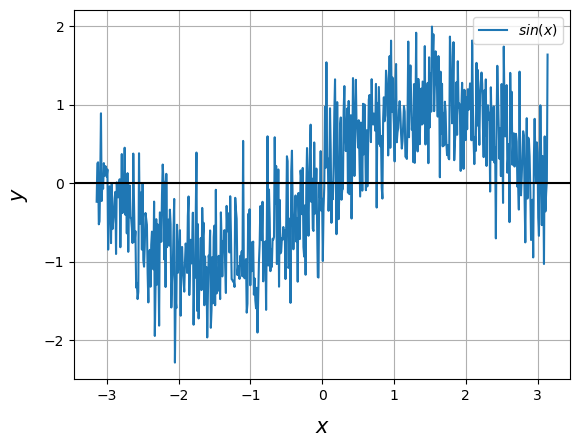

In [29]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-np.pi, np.pi, 0.01)
y_seno = np.sin(x)

sigma = 0.5  # desvio-padrão do ruído
ruido = np.random.randn(len(x)) * sigma 

# adicionando o ruído ruído
y = y_seno + ruido

plt.plot(x, y, linewidth=1.5, label="$sin(x)$")
plt.xlabel("$x$", labelpad=10, size="15")
plt.ylabel("$y$", labelpad=10, size="15")
plt.grid(True, which="both")
plt.axhline(y=0, color="k")
plt.legend()

plt.show()

629Suponha que possamos utilizar este modelo para ajustar uma curva produzida a partir de uma distribuição normal randômica utilizando uma equação de análise empírica:

\begin{align}
\mathbf{x_{a}} = \alpha \mathbf{y_{o}} + (1 - \alpha) \mathbf{x_{b}}
\end{align}

onde,

* $\mathbf{x_{a}}$: é a análise;
* $\mathbf{x_{b}}$: é o background;
* $\mathbf{y_{o}}$: são as observações;
* $\alpha$: é um peso dado à observação e ao background.

Vamos escrever um programa simples para fazer este ajuste.

## O modelo

Já sabemos que o nosso modelo é a função seno. Então, vamos definir um domínio para a nossa função. Seja $\mathbf{x_{0}}$ um vetor com 629 elementos, de 1 a 629:

In [30]:
x0 = np.arange(1,630,1)

In [31]:
x0

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

Como o nosso modelo é a função seno, vamos aplicar a função aos elementos do nosso domínio,e vamos nomear de $\mathbf{x_{b}}$ o vetor com a imagem da nossa função, ou melhor, $\mathbf{x_{b}}$ é o nosso background:

In [32]:
xb = np.sin(x0) + ruido

In [33]:
xb

array([ 6.04241361e-01,  1.16951532e+00,  4.25969098e-01, -1.25145406e+00,
       -1.40494966e+00, -1.62724790e-01,  1.60523593e+00,  8.30973094e-01,
        5.31835360e-01, -5.25634838e-01, -6.46003967e-01, -3.30854738e-01,
        7.56375906e-01,  1.32767598e+00,  8.70967757e-01,  3.51481957e-02,
       -1.64912458e+00, -8.25367177e-01,  2.87935520e-01,  7.93886810e-01,
        2.71309310e-01,  1.99637697e-01, -1.21407061e+00, -1.17166229e+00,
       -2.67981845e-01,  8.18212595e-01,  1.10151221e+00, -3.65006959e-01,
       -3.78010265e-01, -8.78479118e-01, -2.89988859e-01,  8.12701831e-01,
        1.36299815e+00,  3.64242116e-02, -2.70841816e-01, -2.79264552e-01,
       -6.72984899e-01,  4.38466373e-01,  1.22012398e+00,  1.57562843e+00,
       -1.72954715e-01, -4.59943703e-01, -1.06406443e+00,  5.60988480e-01,
        4.01686506e-01,  1.11910088e+00,  5.38032431e-01, -7.52870022e-01,
       -9.37483004e-01, -3.60113165e-01,  3.86645011e-01,  1.85028236e+00,
        6.53069543e-01, -

Como é $\mathbf{x_{b}}$?

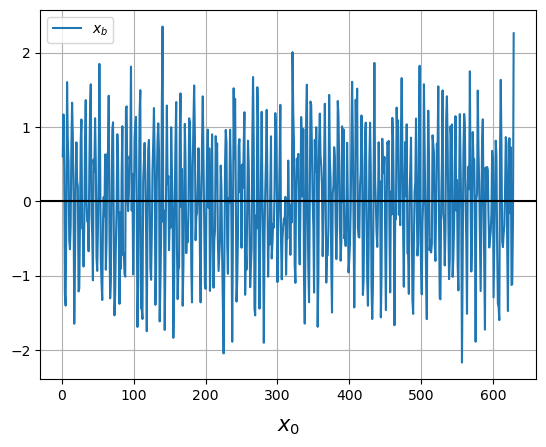

In [34]:
plt.plot(x0, xb, linewidth=1.5, label="$x_{b}$")
plt.xlabel("$x_{0}$", labelpad=10, size="15")
plt.grid(True, which="both")
plt.axhline(y=0, color="k")
plt.legend()

plt.show()

## As observações 

O vetor observação $\mathbf{y_{o}}$, pode ser definido de forma semelhante ao vetor background $\mathbf{x_{b}}$:

In [35]:
mu_true = 0
sigma_true = 1
s = np.random.normal(mu_true, sigma_true, 629)

y = xb + np.sin(s)

In [36]:
y

array([ 0.1815017 ,  0.22107125, -0.41785902, -2.1079837 , -0.4052447 ,
        0.69079281,  2.33178638,  0.58639366,  0.87207079, -0.18857122,
       -1.36838936, -0.31451534,  0.14696968,  1.4421102 ,  0.59960134,
        0.94008036, -1.29711153, -0.54618446,  1.20597095,  0.30748471,
        1.26814783, -0.80029169, -1.95000355, -2.03848126, -1.21938542,
       -0.14558622,  0.99751564,  0.24516078, -0.98593408, -1.85190398,
       -0.80924488,  1.34891276,  0.96700251, -0.93270032, -0.37940082,
        0.53031357,  0.20852186,  0.28628477,  0.55805778,  1.83897408,
        0.74701856, -1.33876548, -0.37088365, -0.37766724,  0.67280237,
        1.19853711, -0.16821516,  0.0999168 , -0.76500231, -0.96877743,
        0.15137026,  0.90119989, -0.30061033, -0.29603121, -1.9301632 ,
       -0.99877978, -0.10015346, -0.23620652, -0.11900881,  1.61306451,
       -0.98484093, -0.22325726,  0.18988017,  1.13995172,  1.06033573,
       -0.81032269, -2.00491324, -0.27860359, -0.21335114,  0.22

Como é $\mathbf{y_{o}}$?

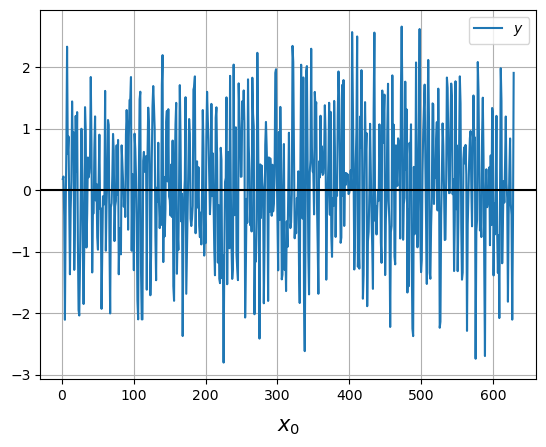

In [37]:
plt.plot(x0, y, linewidth=1.5, label="$y$")
plt.xlabel("$x_{0}$", labelpad=10, size="15")
plt.grid(True, which="both")
plt.axhline(y=0, color="k")
plt.legend()

plt.show()

Observe que ambos, $\mathbf{x_{b}}$ e $\mathbf{y}$, possuem distribuição normal, isto é, ambos são representados por valores aleatórios distribuídos sobre uma curva normal com $\mu_{xb} = -0,0013$ e $\sigma_{xb} = 0,8730$ e $\mu_{y} = 0,0684$ e $\sigma_{y} = 1,0813$:

-0.0013133991822075987 0.8729954153991153
0.06941119127445558 1.081267326864981


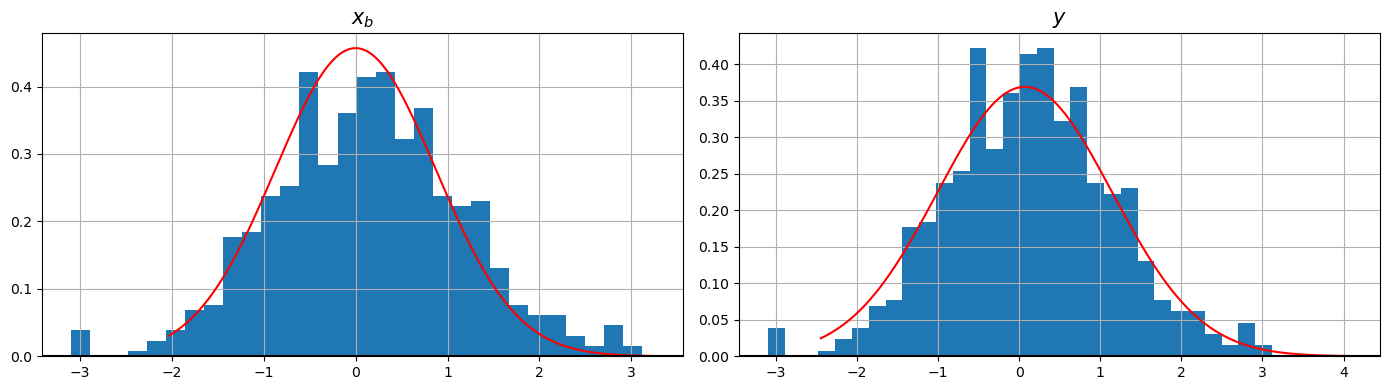

In [38]:
from scipy import stats
from scipy.stats import norm

plt.figure(figsize=(14, 4))

plt.subplot(121)
mu, sigma = stats.norm.fit(xb)
points = np.linspace(stats.norm.ppf(0.01,loc=mu,scale=sigma),
                 stats.norm.ppf(0.9999,loc=mu,scale=sigma),630)
pdf = stats.norm.pdf(points,loc=mu,scale=sigma)
plt.hist(s, 30, density=True);
plt.plot(points, pdf, color="r")
plt.title("$x_{b}$", fontweight="bold", size=15)
plt.grid(True, which="both")
plt.axhline(y=0, color="k")

print(mu, sigma)

plt.subplot(122)
mu, sigma = stats.norm.fit(y)
points = np.linspace(stats.norm.ppf(0.01,loc=mu,scale=sigma),
                 stats.norm.ppf(0.9999,loc=mu,scale=sigma),630)
pdf = stats.norm.pdf(points,loc=mu,scale=sigma)
plt.hist(s, 30, density=True);
plt.plot(points, pdf, color="r")
plt.title("$y$", fontweight="bold", size=15)
plt.grid(True, which="both")
plt.axhline(y=0, color="k")

print(mu, sigma)

plt.tight_layout()

Estamos mantendo as distribuições de $\mathbf{x_{b}}$ e $\mathbf{y_{o}}$ próximas à distribuição normal, porque esta distribuição possui as seguintes propriedades:

\begin{align}
f(\psi) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(\psi-\mu)^{2}}{2\sigma^{2}}}
\end{align}

![Distribuição Normal](./figs/normal.png)

* $\approx 68\%$ dos valores encontram-se a uma distânca da média inferior a um desvio padrão;
* $\approx 95\%$ dos valores encontram-se a uma distância da média inferior a duas vezes o desvio padrão;
* $\approx 99,7\%$ dos valores encontram-se a uma distância da média inferior a três vezes o desvio padrão.

Com $\mathbf{x_{b}}$ e $\mathbf{y_{o}}$ definidos, podemos plotar os seus elementos:

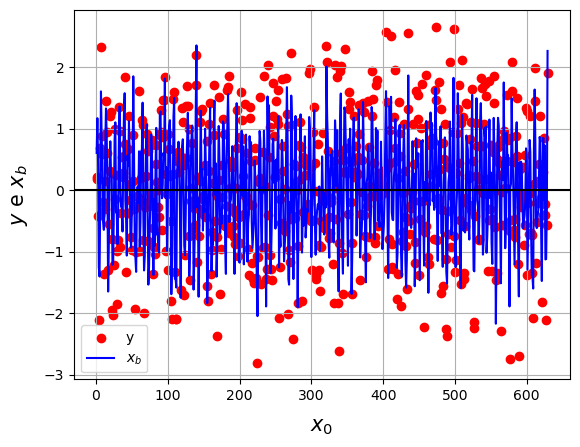

In [39]:
plt.scatter(x0, y, color="red", label="y")
plt.plot(x0, xb, color="blue", label="$x_{b}$")
plt.xlabel("$x_{0}$", labelpad=10, size="15")
plt.ylabel("$y$ e $x_{b}$", labelpad=10, size="15")
plt.grid(True, which="both")
plt.axhline(y=0, color="k")
plt.legend()

plt.show()

Olhando para nossa equação de análise empírica, percebemos que os elementos $\mathbf{x_{b}}$ e $\mathbf{y_{o}}$ já estão definidos, mas ainda precisamos determinar o parâmetro $\alpha$, que é o peso a ser atribuído às observações. $1-\alpha$ é um outro peso que será atribuído ao background - **Por que?** Uma vez determinado o valor de $\alpha$, determinaremos $1-\alpha$ e, consequentemente, o valor de $\mathbf{x_{a}}$, o vetor análise (representado da mesma forma que $\mathbf{x_{b}}$ e $\mathbf{y_{o}}$):

\begin{align}
\mathbf{x_{a}} = \alpha \mathbf{y_{o}} + (1 - \alpha) \mathbf{x_{b}}
\end{align}

## Determinação de $\alpha$:

Antes de determinarmos o parâmetro $\alpha$, precisamos saber o que ele é e como pode ser definido. $\alpha$ é um parâmetro que relaciona as medidas das variâncias das parcelas:

\begin{align}
\alpha = \frac{\sigma_{b}^{2}}{\sigma_{b}^{2} + \sigma_{o}^{2}}
\end{align}

Onde,

- Onde:
  - $\sigma_{b}^{2}$ e $\sigma_{o}^{2}$ são as variâncias do background e das observações

Para calcular $\alpha$, precisamos calcular as variâncias dos vetores $\mathbf{x_{b}}$ e $\mathbf{y_{o}}$ 

A variância, é uma medida de dispersão de uma distribuição. Ela pode ser calculada com base no erro da distribuição dos valores. 

Vamos fazer as seguintes considerações:

  1. Não há relação entre os elementos dos dois vetores $\mathbf{x_{b}}$ e $\mathbf{y_{o}}$
  2. Os erros dos elementos dos vetores $\mathbf{x_{b}}$ e $\mathbf{y_{o}}$ são radômicos, ou seja, não há relação entre os erros dos elementos do vetor background e entre os elementos do vetor observação

Iremos manter a distribuição destes erros de forma conhecida, vamos manter uma distribuição próxima à normal de forma que possamos controlar a média e o desvio padrão. Para isso, fazemos:

onde, 

- $mdo$: média da observação ($\mu_{o}$)
- $mdb$: média do background ($\mu_{b}$)
- $dpo$: desvio-padrão da observação ($\sigma_{o}$)
- $dpb$: desvio-padrão do background ($\sigma_{b}$)

Podemos testar alguns valores para os parâmetros acima e ver o que acontece com o ajustamento da análise.

Exemplo da distribuição dos erros de observação e background:

In [40]:
# Erro e desvio padrão da observação
mdo = 0
dpo = 0.01

# Erro e desvio padrão do background
mdb = 0
dpb = 0.1

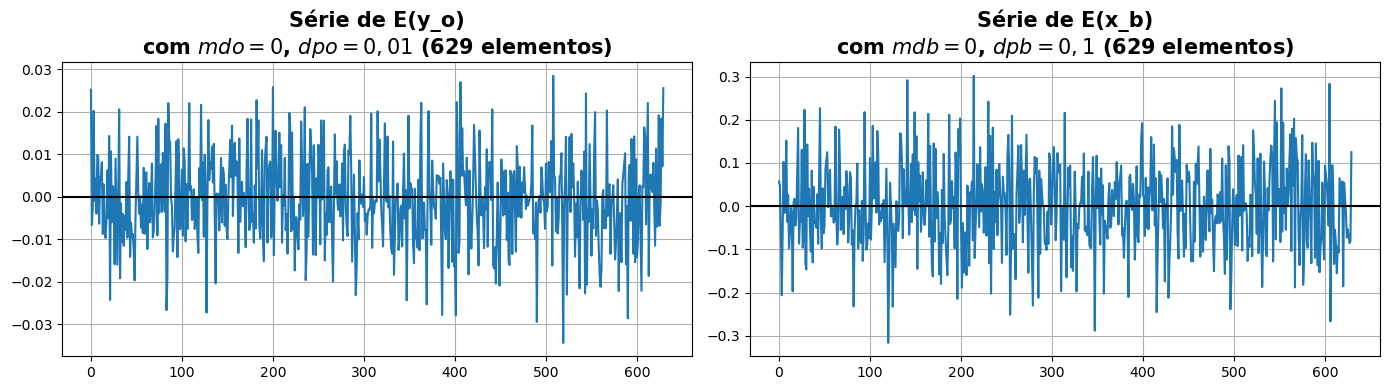

In [41]:
plt.figure(figsize=(14, 4))

plt.subplot(121)
erro = mdo + dpo * np.random.randn(630)
plt.plot(erro)
plt.title("Série de E(y_o)\ncom $mdo=0$, $dpo=0,01$ (629 elementos)", fontweight="bold", size=15)
plt.grid(True, which="both")
plt.axhline(y=0, color="k")

plt.subplot(122)
errb = mdb + dpb * np.random.randn(630)
plt.plot(errb)
plt.title("Série de E(x_b)\ncom $mdb=0$, $dpb=0,1$ (629 elementos)", fontweight="bold", size=15)
plt.grid(True, which="both")
plt.axhline(y=0, color="k")

plt.tight_layout()

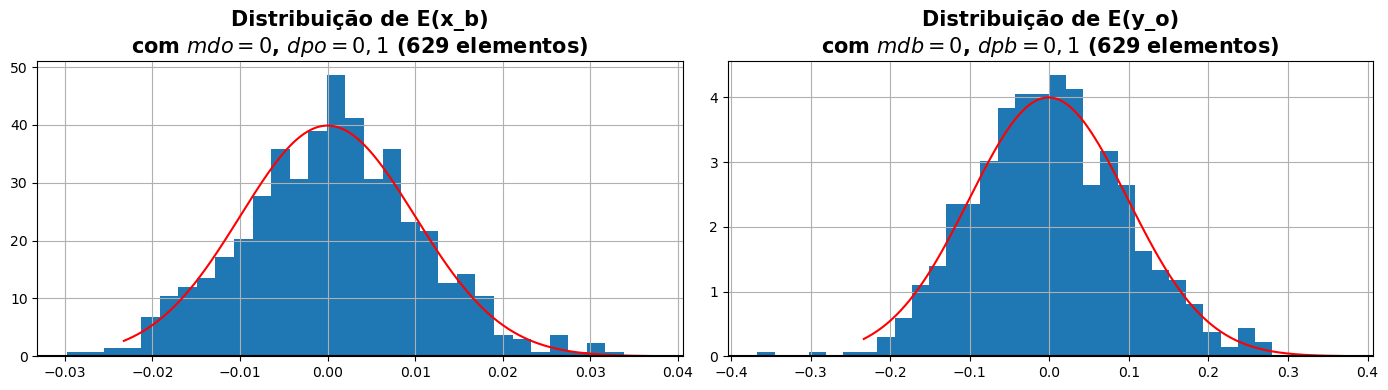

In [42]:
plt.figure(figsize=(14, 4))

plt.subplot(121)
mu1 = 0
sigma1 = 0.01
s1 = np.random.normal(mu1, sigma1, 630)
mu, sigma = stats.norm.fit(erro)
points = np.linspace(stats.norm.ppf(0.01,loc=mu1,scale=sigma1),
                 stats.norm.ppf(0.9999,loc=mu1,scale=sigma1),630)
pdf = stats.norm.pdf(points,loc=mu1,scale=sigma1)
plt.hist(s1, 30, density=True);
plt.title("Distribuição de E(x_b)\ncom $mdo=0$, $dpo=0,1$ (629 elementos)", fontweight="bold", size=15)
plt.plot(points, pdf, color="r")
plt.grid(True, which="both")
plt.axhline(y=0, color="k")

plt.subplot(122)
mu2 = 0
sigma2 = 0.1
s2 = np.random.normal(mu2, sigma2, 630)
mu2, sigma2 = stats.norm.fit(errb)
points = np.linspace(stats.norm.ppf(0.01,loc=mu2,scale=sigma2),
                 stats.norm.ppf(0.9999,loc=mu2,scale=sigma2),630)
pdf = stats.norm.pdf(points,loc=mu2,scale=sigma2)
plt.hist(s2, 30, density=True);
plt.plot(points, pdf, color="r")
plt.title("Distribuição de E(y_o)\ncom $mdb=0$, $dpb=0,1$ (629 elementos)", fontweight="bold", size=15)
plt.grid(True, which="both")
plt.axhline(y=0, color="k")

plt.tight_layout()

## Variância dos erros $\sigma_{b}^{2}$ e $\sigma_{o}^{2}$

Dado que $\alpha$ depende dos valores das variâncias das distribuições dos erros de observação e backgroud, calculamos $E(\mathbf{x_{b}})$ e $E(\mathbf{y_{o}})$:

Partindo-se dos valores das distribuições de $erro$ e $errb$, obtermos as seguintes variâncias:

In [43]:
sigmao2 = np.var(erro)

In [44]:
sigmao2

0.00010983714771688653

In [45]:
sigmab2 = np.var(errb)

In [46]:
sigmab2

0.00995635451080196

A variância dos erros de observação é muito menor do que a variância dos erros de background!

## Cálculo de $\alpha$:

Com isso, o valor de $\alpha$ é calculado:

In [47]:
alpha = sigmab2 / (sigmab2 + sigmao2)

In [48]:
alpha

0.9890885101890611

Da equação de análise empírica, observamos que 99% do peso é dado para as observações enquanto que ($1 - \alpha$), ou seja, 1% de peso é dado para o backround!

## Cálculo de $\mathbf{x_{a}}$:

Observando novamente a equação da análise, notamos que todos os parâmetros estão determinados:

\begin{align}
\mathbf{x_{a}} = \alpha \mathbf{y_{o}} + (1 - \alpha) \mathbf{x_{b}}
\end{align}

Onde,

- $\alpha$: é um valor único ($\alpha \approx 0,99$)
- $\mathbf{y_{o}}$: é um vetor com valores "observados" de apenas uma grandeza (e.g., temperatura)
- $\mathbf{x_{b}}$: é um vetor com valores produzidos (calculados) por um modelo matemático (neste caso, a função seno adicionada de um ruído de distribuição próxima à Normal)

In [49]:
xa = alpha * y + (1 - alpha) * xb

In [50]:
xa

array([ 1.86114424e-01,  2.31420185e-01, -4.08651595e-01, -2.09863768e+00,
       -4.16152970e-01,  6.81479664e-01,  2.32385863e+00,  5.89062391e-01,
        8.68358315e-01, -1.92249088e-01, -1.36050706e+00, -3.14693624e-01,
        1.53619211e-01,  1.44086155e+00,  6.02562348e-01,  9.30206200e-01,
       -1.30095252e+00, -5.49230763e-01,  1.19595381e+00,  3.12792080e-01,
        1.25727083e+00, -7.89380969e-01, -1.94197343e+00, -2.02902298e+00,
       -1.20900419e+00, -1.35069741e-01,  9.98650399e-01,  2.38502940e-01,
       -9.79300730e-01, -1.84128246e+00, -8.03579018e-01,  1.34306190e+00,
        9.71323410e-01, -9.22125725e-01, -3.78216283e-01,  5.21479868e-01,
        1.98903311e-01,  2.87945297e-01,  5.65281907e-01,  1.83610058e+00,
        7.36980279e-01, -1.32917623e+00, -3.78447286e-01, -3.67425104e-01,
        6.69844091e-01,  1.19767034e+00, -1.60508943e-01,  9.06116213e-02,
       -7.66884332e-01, -9.62135998e-01,  1.53937454e-01,  9.11555798e-01,
       -2.90204263e-01, -

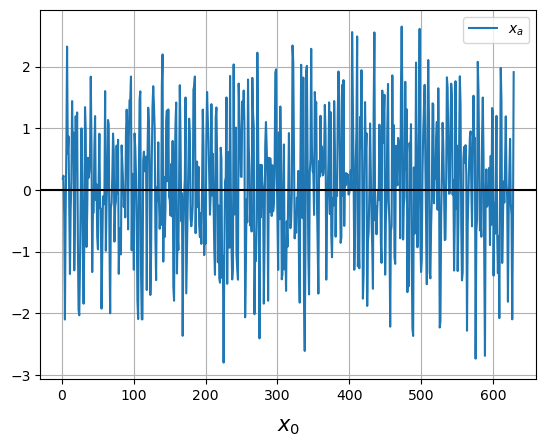

In [51]:
plt.plot(x0, xa, label="$x_{a}$")
plt.xlabel("$x_{0}$", labelpad=10, size="15")
plt.grid(True, which="both")
plt.axhline(y=0, color="k")
plt.legend()

plt.show()

# Plotando todos os resultados juntos

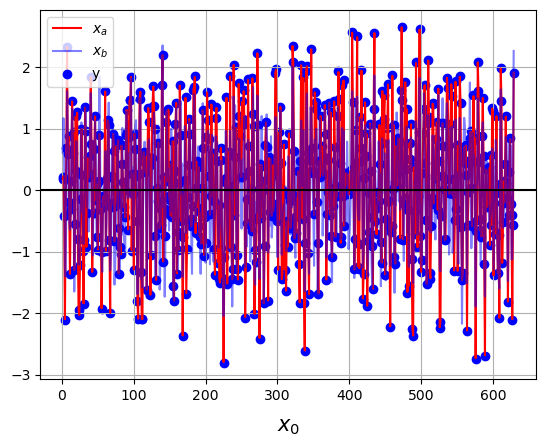

In [52]:
plt.plot(x0, xa, label="$x_{a}$", color="red")
plt.plot(x0, xb, label="$x_{b}$", color="blue", alpha=0.5)
plt.scatter(x0, y, label="y", color="blue")
plt.xlabel("$x_{0}$", labelpad=10, size="15")
plt.legend()
plt.grid(True, which="both")
plt.axhline(y=0, color="k")
plt.legend()

plt.show()

Observe que a análise (curva vermelha) representa o ajuste do background (curva azul) às observações (pontos azuis).

Quanto mais precisa a observação, melhor o ajuste. Mas e se a observação possuir um erro muito grande?

## Exercícios

__Considerando o erro e o desvio padrão da observação e do background:__

1. O que acontece quando o desvio padrão da observação é maior do que o do background e vice-versa? Discuta os resultados.
2. Para uma série de dados pequena, a distribuição dos erros de observação e background continua sendo normal?
3. Como pode ser calculada a precisão da análise?